NAG的准确率为 0.7637737239727289
RMSProp的准确率为 0.7637737239727289
AdaDelta的准确率为 0.7637737239727289
Adam的准确率为 0.7637737239727289


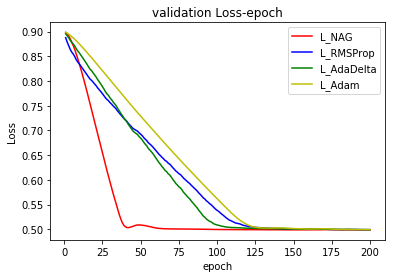

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split 
x_train,y_train = load_svmlight_file("E:/a9a.txt")
x_test,y_test= load_svmlight_file("E:/a9a.t")
x_train=x_train.toarray()
x_test=x_test.toarray()
m_train,n_train= np.shape(x_train)
m_test,n_test= np.shape(x_test)
a=np.ones((m_train))
b=np.ones((m_test))
X_train=np.column_stack((x_train,a))
x_test=np.column_stack((x_test,np.zeros((m_test))))
X_test=np.column_stack((x_test,b))
w = np.zeros(n_train+1)
epoch =200
Iteration=range(1,epoch+1)
L_NAG=[]
L_RMSProp=[]
L_AdaDelta=[]
L_Adam=[]
C=0.9
rand=[]
for i in range(1, epoch+1):
    rand.append(random.randint(0,m_train-100))
def f(x,y,W,i):
    return 1-np.dot(y[i],np.dot(x[i],W))
def NAG(W,γ,η):
    v=0
    for i in range(1, epoch+1):
        g=0
        j=rand[i-1]
        for l in range(100):
            if f(X_train,y_train,(W-γ*v),j+l)>=0:
                g -=C*np.dot(X_train[j+l].transpose(),y_train[j+l])
        g /=100
        g +=W-γ*v
        v=γ*v+η*g
        W=W-v
        loss_test=0
        for k in range(m_test):
            loss_test += C*max(0,f(X_test,y_test,W,k))
        loss_test /=m_test
        loss_test += np.dot(W.transpose(),W)/2
        L_NAG.append(loss_test) 
    y_predict=np.dot(X_test,W)
    y_predict[y_predict>0]=1
    y_predict[y_predict<0]=-1 
    count=0
    for m in range(len(y_test)):
        if y_predict[m]==y_test[m]:
            count +=1
    print("NAG的准确率为",count/m_test)
def RMSProp(W,γ,η,ε):
    G=0
    for i in range(1, epoch+1):
        g=0
        j=rand[i-1]
        for l in range(100):
            if f(X_train,y_train,W,j+l)>=0:
                g -=C*np.dot(X_train[j+l].transpose(),y_train[j+l])
        g /=100
        g +=W
        G=γ*G+(1-γ)*np.dot(g.transpose(),g)
        W=W-(η/np.sqrt(G+ε))*g
        loss_test=0
        for k in range(m_test):
            loss_test += C*max(0,f(X_test,y_test,W,k))
        loss_test /=m_test
        loss_test += np.dot(W.transpose(),W)/2
        L_RMSProp.append(loss_test) 
    y_predict=np.dot(X_test,W)
    y_predict[y_predict>0]=1
    y_predict[y_predict<0]=-1 
    count=0
    for m in range(len(y_test)):
        if y_predict[m]==y_test[m]:
            count +=1
    print("RMSProp的准确率为",count/m_test)
def AdaDelta(W,γ,ε):
    G=0
    Δ=0
    for i in range(1, epoch+1):
        g=0
        j=rand[i-1]
        for l in range(100):
            if f(X_train,y_train,W,j+l)>=0:
                g -=C*np.dot(X_train[j+l].transpose(),y_train[j+l])
        g /=100
        g +=W
        G=γ*G+(1-γ)*np.dot(g.transpose(),g)
        ΔW=-(np.sqrt(Δ+ε)/np.sqrt(G+ε))*g
        W=W+ΔW
        Δ=γ*Δ+(1-γ)*np.dot(ΔW.transpose(),ΔW)
        loss_test=0
        for k in range(m_test):
            loss_test += C*max(0,f(X_test,y_test,W,k))
        loss_test /=m_test
        loss_test += np.dot(W.transpose(),W)/2
        L_AdaDelta.append(loss_test)
    y_predict=np.dot(X_test,W)
    y_predict[y_predict>0]=1
    y_predict[y_predict<0]=-1 
    count=0
    for m in range(len(y_test)):
        if y_predict[m]==y_test[m]:
            count +=1
    print("AdaDelta的准确率为",count/m_test)
def Adam(W,γ,η,β,ε):
    m=0
    G=0
    for i in range(1, epoch+1):
        g=0
        j=rand[i-1]
        for l in range(100):
            if f(X_train,y_train,W,j+l)>=0:
                g -=C*np.dot(X_train[j+l].transpose(),y_train[j+l])
        g /=100
        g +=W
        m=β*m+(1-β)*g
        G=γ*G+(1-γ)*np.dot(g.transpose(),g)
        α=η*(np.sqrt(1-γ)/(1-β))
        W=W-α*m/np.sqrt(G+ε)
        loss_test=0
        for k in range(m_test):
            loss_test += C*max(0,f(X_test,y_test,W,k))
        loss_test /=m_test
        loss_test += np.dot(W.transpose(),W)/2
        L_Adam.append(loss_test)
    y_predict=np.dot(X_test,W)
    y_predict[y_predict>0]=1
    y_predict[y_predict<0]=-1 
    count=0
    for m in range(len(y_test)):
        if y_predict[m]==y_test[m]:
            count +=1
    print("Adam的准确率为",count/m_test)
W=w.transpose()
NAG(W,0.9,0.001)
W=w.transpose()
RMSProp(W,0.9,0.003,1e-8)
W=w.transpose()
AdaDelta(W,0.9,1e-6)
W=w.transpose()
Adam(W,0.9,0.001,0.9,1e-8)
plt.plot(Iteration,L_NAG,color='r',label="L_NAG") 
plt.plot(Iteration,L_RMSProp,color='b',label="L_RMSProp")
plt.plot(Iteration,L_AdaDelta,color='g',label="L_AdaDelta")
plt.plot(Iteration,L_Adam,color='y',label="L_Adam")
plt.title("validation Loss-epoch")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()